# Week 2 Solutions

## Dependencies

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


The provided code snippet is written in Python and uses the pandas library to read a CSV file named 'vehicles.csv'. 

Here's a breakdown of the code:

```python
df = pd.read_csv('datasets/regression-tasks/vehicles.csv',
                header=0,
                sep=',')
```

- [`pd`](command:_github.copilot.openSymbolFromReferences?%5B%22%22%2C%5B%7B%22uri%22%3A%7B%22scheme%22%3A%22vscode-notebook-cell%22%2C%22authority%22%3A%22%22%2C%22path%22%3A%22%2Fc%3A%2FUsers%2FChristian%2FOneDrive%20-%20The%20University%20of%20Colorado%20Denver%2FCurrent%20Classes%2FCSCI_4930_H01_ML%2F006_Activities%2Fdrb-fall24-ml%2Fweek-02%2Fweek-2-solution.ipynb%22%2C%22query%22%3A%22%22%2C%22fragment%22%3A%22Y100sZmlsZQ%3D%3D%22%7D%2C%22pos%22%3A%7B%22line%22%3A0%2C%22character%22%3A5%7D%7D%5D%2C%22faec429b-c777-4dc1-9f99-ce5ba303c010%22%5D "Go to definition") refers to the pandas library, which is commonly used for data manipulation and analysis in Python.
- `read_csv()` is a function provided by pandas to read data from a CSV file.
- `'datasets/regression-tasks/vehicles.csv'` is the path to the CSV file that we want to read. This path is relative to the current working directory.
- `header=0` specifies that the first row of the CSV file contains the column names.
- `sep=','` specifies that the columns in the CSV file are separated by commas.

After executing this code, the data from the CSV file will be stored in a pandas DataFrame object named `df`. A DataFrame is a two-dimensional table-like data structure that can hold data of different types (similar to a spreadsheet). It provides various methods and operations to manipulate and analyze the data.

It's important to ensure that the CSV file exists in the specified path, and that the file is properly formatted with the correct column names and separators.

In [2]:
df = pd.read_csv('datasets/regression-tasks/vehicles.csv',
                header=0,
                sep=',')

C:\Users\Christian\AppData\Local\Temp\ipykernel_13976\367865980.py:1: DtypeWarning: Columns (74,75,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('datasets/regression-tasks/vehicles.csv',


The code df.head(n=5) is used to display the first n rows of a DataFrame df. In this case, n is set to 5, so the code will show the first 5 rows of the DataFrame. This is a useful way to quickly inspect the data and get a sense of its structure and contents

In [3]:
df.head(n=5)

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,14.167143,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,27.046364,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,11.018889,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,27.046364,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,15.658421,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


## Q-1


* How many samples are there in the dataset?
* Also, how many features are there per sample?

### Research Answers:

#### Check the number of samples and features

In [7]:
num_samples, num_features = df.shape

print(f"Number of samples: {num_samples}")
print(f"Number of features per sample: {num_features}")

Number of samples: 48031
Number of features per sample: 84


Explanation:

    df.shape[0]: The number of rows (samples) in the dataset.
    df.shape[1]: The number of columns (features) in the datase

* The code df.shape is used to retrieve the dimensions of a DataFrame in Python. 
* The shape attribute returns a tuple containing the number of rows and columns in the DataFrame. 
* The first element of the tuple represents the number of rows, while the second element represents the number of columns. 
* This information is useful for understanding the size and structure of the DataFrame, which can be helpful for data analysis and manipulation tasks. 
  * For example, you can use df.shape[0] to get the number of rows or df.shape[1] to get the number of columns in the DataFrame.

### Class Answers

In [8]:
df.shape

(48031, 84)

## Q-2


* Let’s filter the dataset. We are interested only with vehicle’s engine displacement (`displ`), model year (`year`), unadjusted mpg on highway (`UHighway`), unadjusted mpg on city (`UCity`) and the fuel type (`fuelType`). 
* Create a dataframe that contains the filtered dataset. 

### Research Answers

#### Filter the dataset based on the required columns

In [10]:
filtered_df = df[['displ', 'year', 'UHighway', 'UCity', 'fuelType']]

#### Display the first few rows of the filtered DataFrame

In [11]:
filtered_df.head()


,displ,year,UHighway,UCity,fuelType
0,2.0,1985,35.0000,23.3333,Regular
1,4.9,1985,19.0000,11.0000,Regular
2,2.2,1985,47.0000,29.0000,Regular
3,5.2,1985,16.6667,12.2222,Regular
4,2.2,1993,32.0000,21.0000,Premium


### Class Answers

In [6]:
data_filtered = df[ ['displ', 'year','UHighway','UCity','fuelType'] ]

In [ ]:
data_filtered.head()

## Q-3



* Plot a histogram of engine displacement data.
* Plot histograms for each of the attributes present in the filtered dataset.
* Plot a scatter plot between unadjusted highway mpg (UHighway) and engine displacement (displ).
* Plot a scatter plot between unadjusted city mpg (UCity) and engine displacement (displ).
* Plot a scatter-matrix between variables present in the filtered dataset.

## Research Answers

### Plot a histogram of engine displacement data

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(filtered_df['displ'], bins=20, edgecolor='black')
plt.title('Histogram of Engine Displacement')
plt.xlabel('Engine Displacement (displ)')
plt.ylabel('Frequency')
plt.show()

### Plot histograms for each of the attributes in the filtered dataset

In [ ]:
filtered_df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Filtered Dataset Attributes')
plt.show()

### Plot a scatter plot between unadjusted city mpg (UCity) and engine displacement (displ)

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(filtered_df['displ'], filtered_df['UCity'], alpha=0.6, edgecolors='w', s=100)
plt.title('Scatter Plot: Engine Displacement vs. City MPG')
plt.xlabel('Engine Displacement (displ)')
plt.ylabel('Unadjusted City MPG (UCity)')
plt.grid(True)
plt.show()

### Plot a scatter-matrix between variables present in the filtered dataset

In [ ]:
sns.pairplot(filtered_df)
plt.suptitle('Scatter Matrix of Filtered Dataset', y=1.02)
plt.show()

## Class Answers

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.200e+01, 0.000e+00,
        6.000e+00, 1.860e+02, 8.300e+01, 5.530e+02, 1.064e+03, 1.774e+03,
        1.767e+03, 4.180e+02, 5.773e+03, 1.485e+03, 1.264e+03, 5.198e+03,
        3.400e+02, 1.705e+03, 3.160e+02, 4.290e+03, 8.050e+02, 5.340e+02,
        2.553e+03, 1.341e+03, 6.180e+02, 1.438e+03, 1.449e+03, 9.500e+01,
        1.939e+03, 4.730e+02, 6.700e+02, 3.840e+02, 2.670e+02, 2.029e+03,
        0.000e+00, 1.749e+03, 3.080e+02, 4.630e+02, 1.197e+03, 1.600e+02,
        8.070e+02, 2.400e+01, 9.240e+02, 9.000e+01, 1.510e+02, 1.520e+02,
        1.430e+02, 1.000e+01, 0.000e+00, 0.000e+00, 4.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.600e+01, 0.000e+00, 2.000e+01]),
 array([0.  , 0.14, 0.28, 0.42, 0.56, 0.7 , 0.84, 0.98, 1.12, 1.26, 1.4 ,
        1.54, 1.68, 1.82, 1.96, 2.1 , 2.24, 2.38, 2.52, 2.66, 2.8 , 2.94,
        3.08, 3.22, 3.36, 3.5 , 3.64, 3.78, 3.92, 4.06, 4.2 , 4.34, 4.48,
        4.62, 4.76, 4.9 , 5.04, 5.18

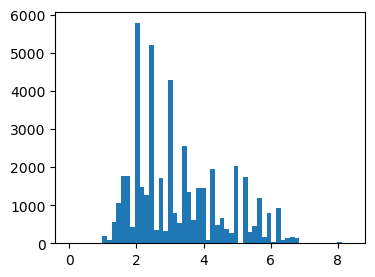

In [13]:
plt.figure(figsize=(4,3))
plt.hist(data_filtered['displ'],bins=60)

<Axes: >

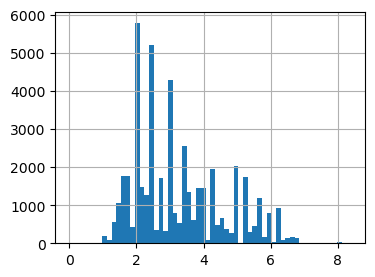

In [14]:
data_filtered['displ'].hist(bins=60,figsize=(4,3))

In [15]:
data_filtered['fuelType'].unique()

array(['Regular', 'Premium', 'Diesel', 'CNG', 'Gasoline or natural gas',
       'Gasoline or E85', 'Electricity', 'Gasoline or propane',
       'Premium or E85', 'Midgrade', 'Premium Gas or Electricity',
       'Regular Gas and Electricity', 'Premium and Electricity',
       'Regular Gas or Electricity', 'Hydrogen'], dtype=object)

array([[<Axes: title={'center': 'displ'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'UHighway'}>,
        <Axes: title={'center': 'UCity'}>]], dtype=object)

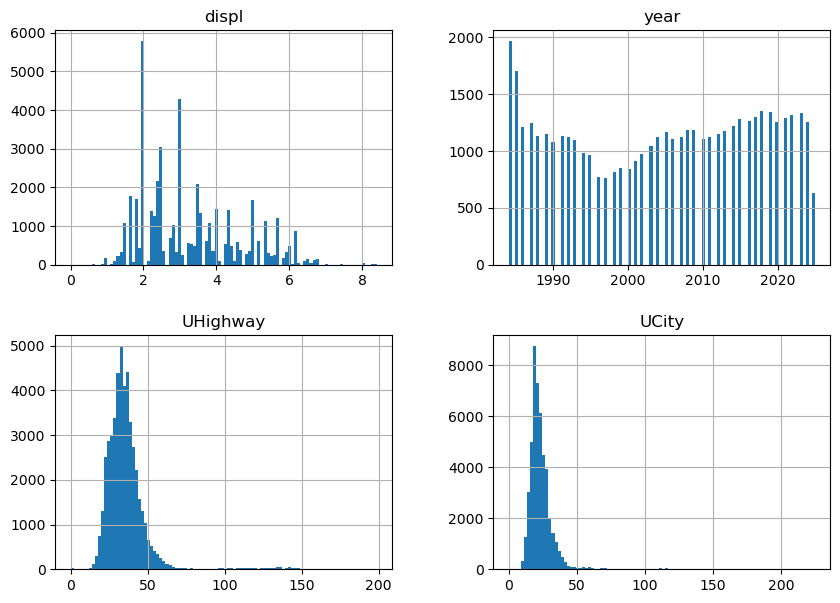

In [16]:
data_filtered.hist(bins=100,figsize=(10,7))

In [17]:
#data_filtered['displ'].max()

<Axes: xlabel='displ', ylabel='UHighway'>

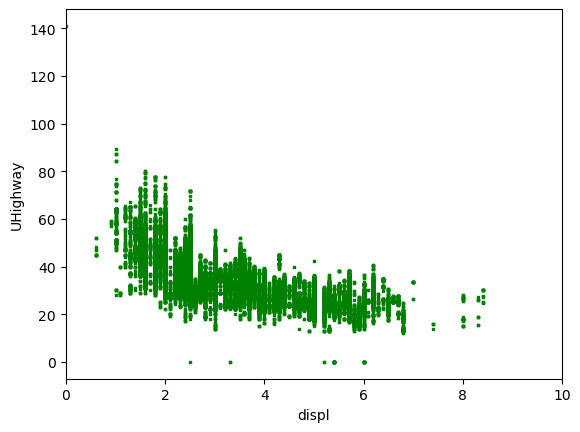

In [18]:
#scatter of UHighway vs displ
data_filtered.plot(kind='scatter', 
                   xlim=[0,10],
                   x='displ',
                   y='UHighway',
                   s=2, #size of each point
                   c='g', #color
                   marker='s', #square-box-filled
                  )
                   

<Axes: xlabel='displ', ylabel='UCity'>

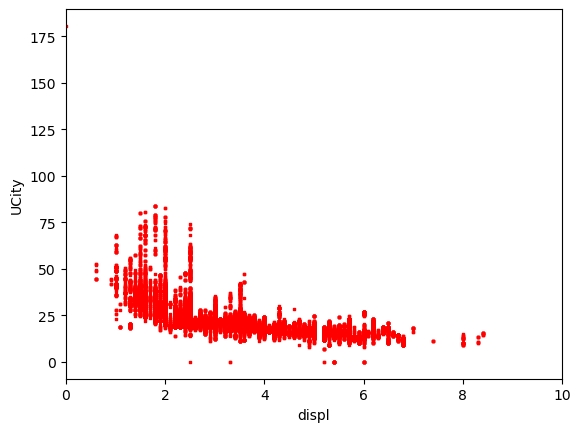

In [19]:
#scatter of UHighway vs displ
data_filtered.plot(kind='scatter', 
                   xlim=[0,10],
                   x='displ',
                   y='UCity',
                   s=2, #size of each point
                   c='r', #color
                   marker='s', #square-box-filled
                  )

array([[<Axes: xlabel='displ', ylabel='displ'>,
        <Axes: xlabel='year', ylabel='displ'>,
        <Axes: xlabel='UHighway', ylabel='displ'>,
        <Axes: xlabel='UCity', ylabel='displ'>],
       [<Axes: xlabel='displ', ylabel='year'>,
        <Axes: xlabel='year', ylabel='year'>,
        <Axes: xlabel='UHighway', ylabel='year'>,
        <Axes: xlabel='UCity', ylabel='year'>],
       [<Axes: xlabel='displ', ylabel='UHighway'>,
        <Axes: xlabel='year', ylabel='UHighway'>,
        <Axes: xlabel='UHighway', ylabel='UHighway'>,
        <Axes: xlabel='UCity', ylabel='UHighway'>],
       [<Axes: xlabel='displ', ylabel='UCity'>,
        <Axes: xlabel='year', ylabel='UCity'>,
        <Axes: xlabel='UHighway', ylabel='UCity'>,
        <Axes: xlabel='UCity', ylabel='UCity'>]], dtype=object)

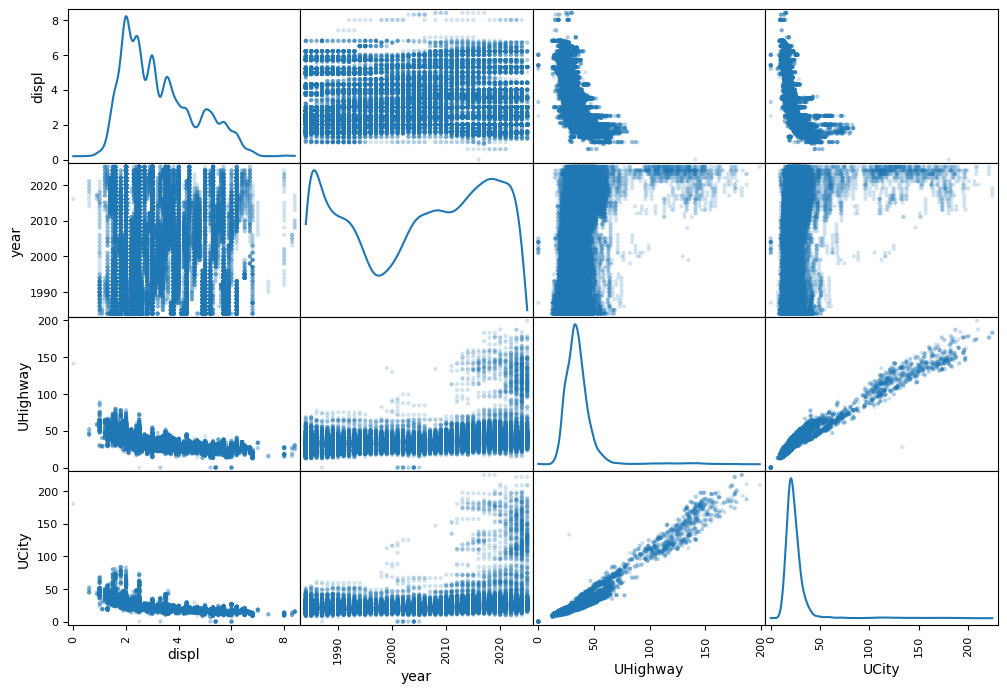

In [20]:
#scatter-matrix
pd.plotting.scatter_matrix(data_filtered,
               figsize=(12,8),
               alpha=0.2,
               diagonal='kde'
              )

In [39]:
#data_filtered.query('displ == 0')

## Q-4


* Find outlier samples that do not have value for engine displacement. 
* Please report how many such samples did you find?
* We now have several option to amend our dataset for further processing. 
    * Option 1: Remove the samples, or, 
    * Option 2: fill the value with any of the central tendency. 
* For this question, please choose option 2 and prepare the dataset.

### Step 1: Find the samples that have missing values for 'displ'

In [34]:

missing_displ_samples = filtered_df[filtered_df['displ'].isna()]

### Step 2: Report how many such samples were found

In [35]:

num_missing_displ_samples = missing_displ_samples.shape[0]
print(f"Number of samples with missing engine displacement: {num_missing_displ_samples}")

Number of samples with missing engine displacement: 0


### Step 3: Fill the missing 'displ' values with the mean of the 'displ' column

In [36]:

mean_displ = filtered_df['displ'].mean()

### Avoiding the SettingWithCopyWarning by assigning the filled values back to a new DataFrame or using the appropriate method


In [37]:
filtered_df = filtered_df.assign(displ=filtered_df['displ'].fillna(mean_displ))

### Step 4: Verify that there are no missing values for 'displ' now

In [38]:
num_missing_displ_samples_after_fill = filtered_df['displ'].isna().sum()
print(f"Number of samples with missing engine displacement after filling: {num_missing_displ_samples_after_fill}")

Number of samples with missing engine displacement after filling: 0


#### Explanation:

    We use assign() to update the displ column with the filled values, which avoids the warning related to modifying a copy of the data.
    The code assigns the new DataFrame back to filtered_df so that the displ column is properly updated.

## Class Answers

In [24]:
data_filtered.shape

(48031, 5)

In [25]:
print(f'num of missing values in displ field is {sum(data_filtered.displ.isnull())}')

num of missing values in displ field is 963


In [26]:
data_filtered_preprocessed = data_filtered.fillna(value=data_filtered.displ.mean())

In [27]:
data_filtered_preprocessed.shape

(48031, 5)

In [28]:
print(f'num of missing values in displ field is {sum(data_filtered_preprocessed.displ.isnull())}')

num of missing values in displ field is 0


## Q-5


* Shuffle the datasamples

# Research Answers

### Shuffle the dataset

In [40]:
shuffled_df = filtered_df.sample(frac=1, random_state=42).reset_index(drop=True)

### Display the first few rows of the shuffled dataset

In [41]:
shuffled_df.head()

,displ,year,UHighway,UCity,fuelType
0,3.6,2009,31.5222,18.8066,Premium
1,3.4,2002,30.7000,19.8000,Regular
2,3.7,2006,25.7452,18.1978,Regular
3,6.2,1989,28.0000,19.0000,Diesel
4,2.5,1989,27.0000,20.0000,Premium


## Class Answers:

In [42]:
data_shuffled = data_filtered_preprocessed.sample(frac=1 #return all rows
                                                 )

In [43]:
data_shuffled.shape

(48031, 5)

## Q-6


* Take one half of the dataset as training set, and the remaining half as test set. Please separate independent (displ) and dependent variable (UHighway)

## Research Answers:

Explanation:

    Independent (X) and Dependent (y) Variables:
        X contains the displ (engine displacement) column as the independent variable.
        y contains the UHighway (unadjusted highway MPG) column as the dependent variable.
    Splitting the Dataset:
        We split the dataset into two halves by dividing the total length of the dataset by 2 and using iloc to select the first half as the training set and the second half as the test set.
    Training and Test Sets:
        X_train and y_train contain the independent and dependent variables for the training set, respectively.
        X_test and y_test contain the independent and dependent variables for the test set, respectively.

This will give you two halves of the dataset, one for training and one for testing, with the independent and dependent variables separated.

### Step 1: Define independent (displ) and dependent (UHighway) variables

In [52]:
X = shuffled_df[['displ']]  # Independent variable: engine displacement
y = shuffled_df['UHighway']  # Dependent variable: unadjusted highway MPG

### Step 2: Split the data into two halves, Using integer-based indexing to split the data into 50% training and 50% testing

In [53]:

train_size = len(shuffled_df) // 2

X_train = X.iloc[:train_size]  # First half as training data (independent variable)
y_train = y.iloc[:train_size]  # First half as training data (dependent variable)

X_test = X.iloc[train_size:]   # Second half as testing data (independent variable)
y_test = y.iloc[train_size:]   # Second half as testing data (dependent variable)

### Display the first few rows of the training and test sets

In [54]:

print("Training Set (Independent Variable - displ):")
print(X_train.head())

print("Training Set (Dependent Variable - UHighway):")
print(y_train.head())

print("Test Set (Independent Variable - displ):")
print(X_test.head())

print("Test Set (Dependent Variable - UHighway):")
print(y_test.head())

Training Set (Independent Variable - displ):
   displ
0    3.6
1    3.4
2    3.7
3    6.2
4    2.5
Training Set (Dependent Variable - UHighway):
0    31.5222
1    30.7000
2    25.7452
3    28.0000
4    27.0000
Name: UHighway, dtype: float64
Test Set (Independent Variable - displ):
       displ
24015    4.2
24016    3.1
24017    3.8
24018    2.4
24019    5.3
Test Set (Dependent Variable - UHighway):
24015    24.6000
24016    37.5593
24017    34.5178
24018    34.7000
24019    28.5000
Name: UHighway, dtype: float64


## Class Answer

In [55]:
data_shuffled.shape

(48031, 5)

In [56]:
n_training = data_shuffled.shape[0]//2
n_training

24015

In [47]:
data_train = data_shuffled.iloc[0:n_training,:]
data_train.shape

(24015, 5)

In [48]:
data_test = data_shuffled.iloc[n_training:,:]
data_test.shape

(24016, 5)

In [49]:
data_train_x = data_train['displ'].values.reshape(-1,1)
data_train_y = data_train['UHighway'].values.reshape(-1,1)

In [50]:
data_test_x = data_test['displ'].values.reshape(-1,1)
data_test_y = data_test['UHighway'].values.reshape(-1,1)

In [51]:
data_train_x.shape

(24015, 1)

## Q-7


* Build a linear regression model based on the training dataset.

## Research Answers     

### Step 1: Initialize the Linear Regression model

In [62]:
model = LinearRegression()

### Step 2: Train the model using the training dataset

In [63]:
model.fit(X_train, y_train)

LinearRegression()

### Step 3: Display the coefficients (slope) and intercept of the linear regression model

In [64]:
slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope (Coefficient of displ): {slope}")
print(f"Intercept: {intercept}")


Slope (Coefficient of displ): -4.736519299739563
Intercept: 51.87518787479081


###  Step 4: Predict the values for the test dataset to verify the model (optional)

In [65]:
y_pred = model.predict(X_test)

### Display first few predicted values

In [66]:

print("First few predictions for the test set:")
print(y_pred[:5])

First few predictions for the test set:
[31.98180682 37.19197805 33.87641454 40.50754156 26.77163559]


## Class Answers:

In [67]:
model = linear_model.LinearRegression()

In [69]:
model.fit(X=data_train_x,
            y=data_train_y)

LinearRegression()

## Q-8


* Use the trained model to predict Uhighway of the test dataset 

## Research Answers: 

Explanation:

    Prediction:
        model.predict(X_test) predicts the UHighway values for the test dataset (X_test contains the independent variable displ from the test set).
    Displaying Predictions:
        We display the first few predicted values (y_pred[:5]) and compare them to the actual UHighway values from the test set (y_test[:5]).

### Step 1: Use the trained model to predict UHighway for the test dataset

In [72]:
y_pred = model.predict(X_test)

c:\Users\Christian\anaconda3\envs\venv-ml\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


### Step 2: Display the first few predictions and compare them to the actual values

In [73]:
print("Predicted UHighway values for the test set:")
print(y_pred[:5])

print("\nActual UHighway values for the test set:")
print(y_test[:5].values)

Predicted UHighway values for the test set:
[[31.92977328]
 [37.12645799]
 [33.81947681]
 [40.43343917]
 [26.73308857]]

Actual UHighway values for the test set:
[24.6    37.5593 34.5178 34.7    28.5   ]


## Class Answers: 

In [71]:
pred = model.predict(data_test_x)

## Q-9


* Evaluate the model performance (in terms of Root Mean Squared Error)

## Research Answers:

Explanation:

    Mean Squared Error (MSE):
        We use mean_squared_error(y_test, y_pred) to compute the average squared difference between the actual (y_test) and predicted (y_pred) UHighway values.
    Root Mean Squared Error (RMSE):
        RMSE is obtained by taking the square root of the MSE using np.sqrt(mse). This gives us the RMSE, which represents the model’s error in terms of the original units (in this case, MPG).

This will output the RMSE of the model, which indicates how well the model performed on the test dataset. A lower RMSE indicates better performance.

### Step 1: Calculate the Mean Squared Error (MSE) between the actual and predicted values

In [78]:
mse = mean_squared_error(y_test, y_pred)

### Step 2: Calculate the Root Mean Squared Error (RMSE)

In [79]:
rmse = np.sqrt(mse)

### Step 3: Display the RMSE

In [82]:
print(f"Root Mean Squared Error (RMSE) of the model: {rmse}")

Root Mean Squared Error (RMSE) of the model: 14.501534237020607


### Scatter plot for the training set

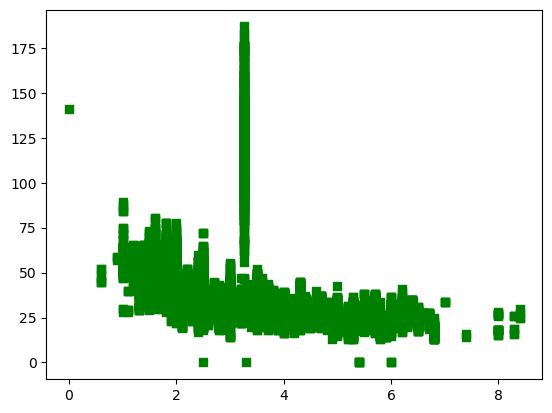

In [84]:
plt_train = plt.scatter(X_train, y_train, marker='s', color='green', label='Train')

### Scatter plot for the test set

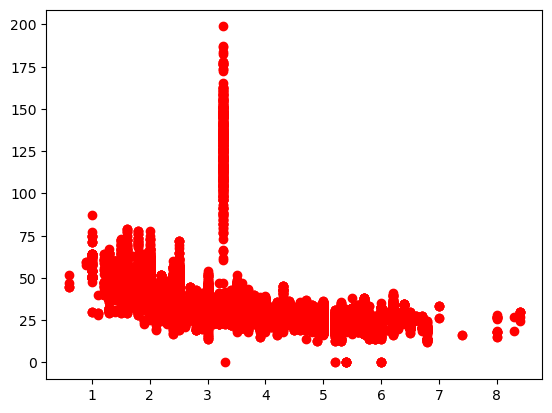

In [85]:

plt_test = plt.scatter(X_test, y_test, marker='o', color='red', label='Test')

### Plotting the regression line for the test set predictions

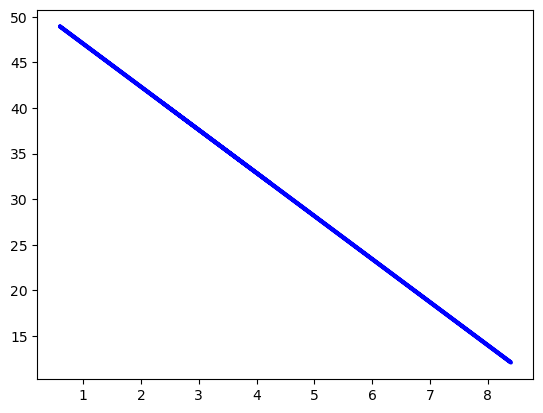

In [86]:

plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Prediction')

### Adding legend, labels, and title

C:\Users\Christian\AppData\Local\Temp\ipykernel_13976\1668922497.py:1: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best')


Text(0.5, 1.0, 'Linear Regression: Engine Displacement vs Fuel Economy')

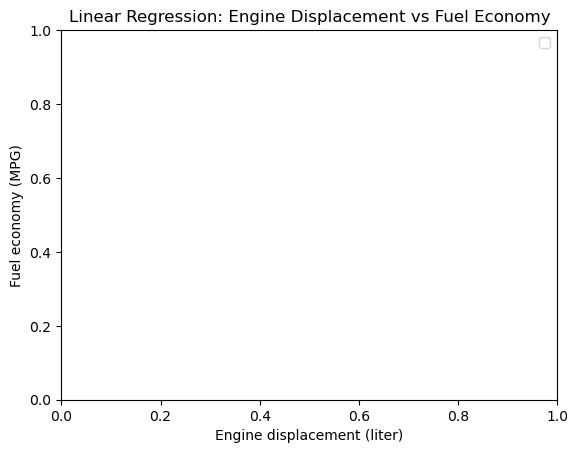

In [87]:
plt.legend(loc='best')
plt.xlabel("Engine displacement (liter)")
plt.ylabel("Fuel economy (MPG)")
plt.title("Linear Regression: Engine Displacement vs Fuel Economy")


### Show the plot

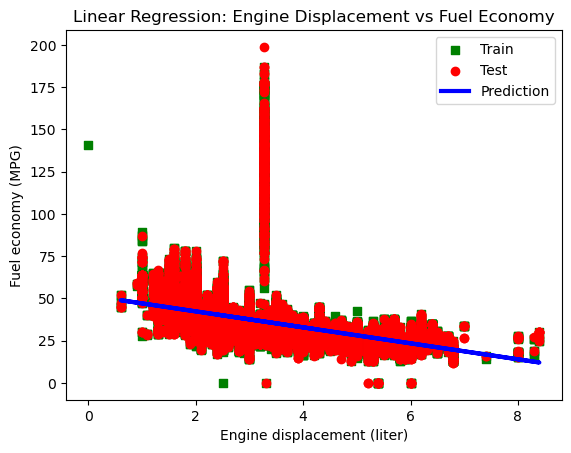

In [93]:

# Scatter plot for the training set
plt_train = plt.scatter(X_train, y_train, marker='s', color='green', label='Train')

# Scatter plot for the test set
plt_test = plt.scatter(X_test, y_test, marker='o', color='red', label='Test')

# Plotting the regression line for the test set predictions
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Prediction')

# Adding legend, labels, and title
plt.legend(loc='best')
plt.xlabel("Engine displacement (liter)")
plt.ylabel("Fuel economy (MPG)")
plt.title("Linear Regression: Engine Displacement vs Fuel Economy")

# Show the plot
plt.show()

## Class Answers:

In [75]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(f'RMSE = {np.sqrt(mean_squared_error(data_test_y, pred))}')
print(f'R-squared error = {r2_score(data_test_y, pred)}')


RMSE = 14.531659932361194
R-squared error = 0.16030406723092572


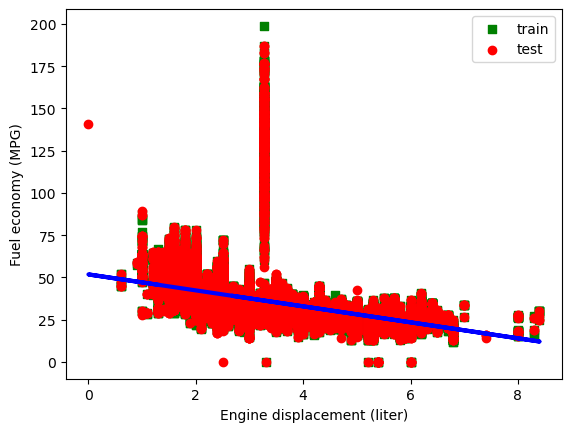

In [76]:
# Plot outputs
plt_train = plt.scatter(data_train_x, data_train_y,  marker='s', color='green')
plt_test = plt.scatter(data_test_x, data_test_y,  marker='o', color='red')
plt.plot(data_test_x, pred, color='blue', linewidth=3)
plt.legend ((plt_train, plt_test), ('train', 'test'))
plt.xlabel ("Engine displacement (liter)")
plt.ylabel ("Fuel economy (MPG)")

plt.show()